In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [16]:
df = pd.read_csv("../data_raw/player_stats_with_salaries.csv")
df.head()


,Player,Squad,Pos,Age,Gls,Ast,Min,MP,GS,xG,...,Red,League,Country,Source,Source_URL,position,age,weekly_gross,annual_gross,currency
0,Brenden Aaronson,Leeds United,"FW,MF",25-064,1,2,911,16,10,2.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,AM,24.0,45000.0,2340000.0,£
1,Zach Abbott,Nott'ham Forest,DF,19-226,0,0,45,1,0,0.0,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,19.0,12500.0,650000.0,£
2,Joshua Acheampong,Chelsea,DF,19-234,1,0,349,5,4,0.6,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,NaN,NaN,NaN,NaN,NaN
3,Tyler Adams,Bournemouth,MF,26-314,2,1,"1,195",15,15,0.5,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,DM,26.0,60000.0,3120000.0,£
4,Tosin Adarabioyo,Chelsea,DF,28-092,0,0,561,9,5,0.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,27.0,120000.0,6240000.0,£


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        2361 non-null   object 
 1   Squad         2361 non-null   object 
 2   Pos           2361 non-null   object 
 3   Age           2360 non-null   object 
 4   Gls           2361 non-null   int64  
 5   Ast           2361 non-null   int64  
 6   Min           2361 non-null   object 
 7   MP            2361 non-null   int64  
 8   GS            2361 non-null   int64  
 9   xG            2361 non-null   float64
 10  npxG          2361 non-null   float64
 11  xAG           2361 non-null   float64
 12  PrgC          2361 non-null   int64  
 13  PrgP          2361 non-null   int64  
 14  Yellow        2361 non-null   int64  
 15  Red           2361 non-null   int64  
 16  League        2361 non-null   object 
 17  Country       2361 non-null   object 
 18  Source        2361 non-null 

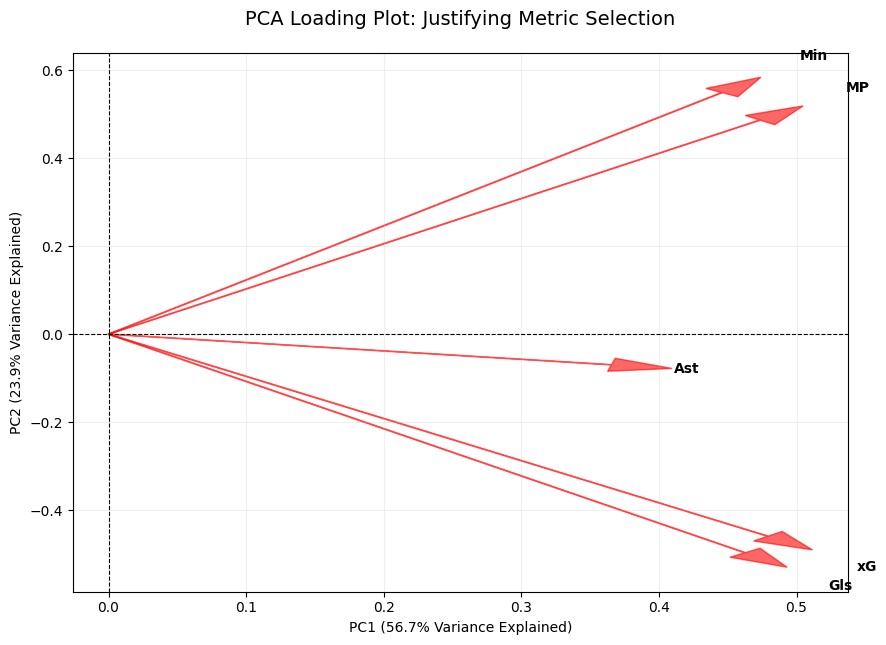

Relative weights (Loadings) of each feature in the First Principal Component (PC1):
xG     0.479167
MP     0.473458
Gls    0.462551
Min    0.445765
Ast    0.365482
Name: PC1, dtype: float64


In [18]:
# [Analysis 1] Identifying Performance Drivers using PCA
# We use Principal Component Analysis (PCA) to prove that Goals (Gls) and Assists (Ast) 
# are the most significant features that capture the variance in player performance.

# 1. Loading and Cleaning Data
df = pd.read_csv('../data_raw/player_stats_with_salaries.csv')
df['Min'] = df['Min'].astype(str).str.replace(',', '').astype(float)

# 2. Selecting Features and Handling Missing Values
features = ['Gls', 'Ast', 'xG', 'Min', 'MP']
df_clean = df.dropna(subset=features + ['annual_gross'])

# 3. Scaling and PCA Transformation
x = df_clean[features]
x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

# 4. Extracting Loadings (Modern iloc-based approach)
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=features
)

# 5. Professional Visualization
plt.figure(figsize=(10, 7))

for i, feature in enumerate(features):
    # Using .iloc to access values by position (Avoids FutureWarnings)
    pc1_val = loadings['PC1'].iloc[i]
    pc2_val = loadings['PC2'].iloc[i]
    
    plt.arrow(0, 0, pc1_val, pc2_val, color='red', alpha=0.6, head_width=0.03)
    plt.text(pc1_val * 1.15, pc2_val * 1.15, feature, 
             color='black', fontweight='bold', ha='center', va='center')

# Aesthetic adjustments
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance Explained)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance Explained)')
plt.title('PCA Loading Plot: Justifying Metric Selection', fontsize=14, pad=20)
plt.grid(alpha=0.2)

plt.show()

# Final Summary Print
print("Relative weights (Loadings) of each feature in the First Principal Component (PC1):")
print(loadings['PC1'].sort_values(ascending=False))

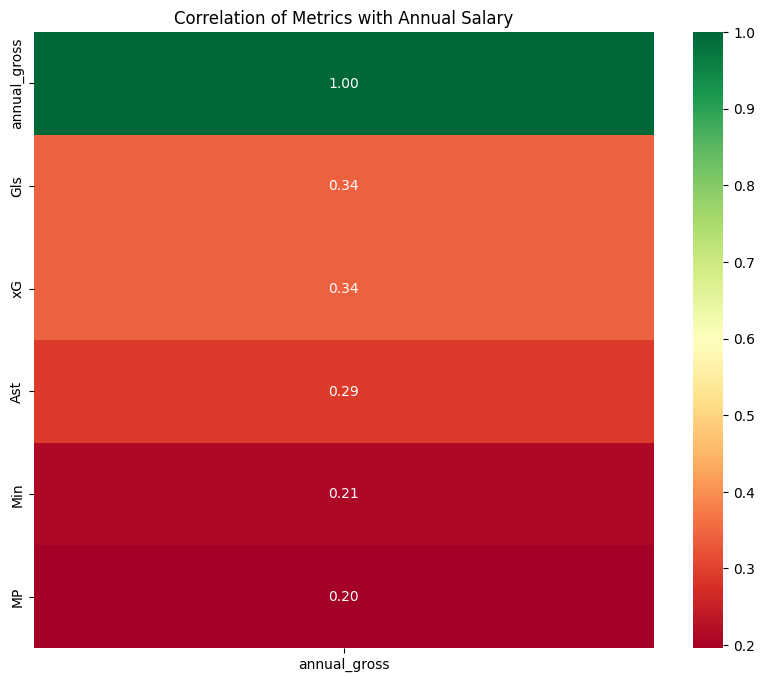

In [19]:
# [Analysis 2] Validating Correlation with Salary
# This Heatmap confirms the direct relationship between the previously identified 
# performance metrics (Gls, Ast) and the target variable (Annual Salary).
correlation_matrix = df_clean[features + ['annual_gross']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['annual_gross']].sort_values(by='annual_gross', ascending=False), 
            annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlation of Metrics with Annual Salary')
plt.show()

In [20]:
# Remove rows with missing values in key columns (salary, goals, assists)
# to ensure the analysis is based on complete and reliable data.
df_clean = df.dropna(subset=['annual_gross', 'Gls', 'Ast'])
df_clean

,Player,Squad,Pos,Age,Gls,Ast,Min,MP,GS,xG,...,Red,League,Country,Source,Source_URL,position,age,weekly_gross,annual_gross,currency
0,Brenden Aaronson,Leeds United,"FW,MF",25-064,1,2,911.0,16,10,2.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,AM,24.0,45000.0,2340000.0,£
1,Zach Abbott,Nott'ham Forest,DF,19-226,0,0,45.0,1,0,0.0,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,19.0,12500.0,650000.0,£
3,Tyler Adams,Bournemouth,MF,26-314,2,1,1195.0,15,15,0.5,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,DM,26.0,60000.0,3120000.0,£
4,Tosin Adarabioyo,Chelsea,DF,28-092,0,0,561.0,9,5,0.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,27.0,120000.0,6240000.0,£
5,Simon Adingra,Sunderland,"FW,MF",23-358,0,0,382.0,10,5,0.1,...,0,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,LW,23.0,70000.0,3640000.0,£
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,Warren Zaïre-Emery,Paris S-G,"MF,DF",19-292,1,1,1247.0,16,14,0.4,...,0,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,CM,19.0,220192.0,11450000.0,€
2357,Denis Zakaria,Monaco,MF,29-035,0,1,527.0,7,6,0.0,...,1,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,DM,28.0,88461.0,4600000.0,€
2358,Melvin Zinga,Angers,GK,23-284,0,0,90.0,1,1,0.0,...,0,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,GK,23.0,5192.0,270000.0,€
2359,Luck Zogbé,Brest,"FW,DF",20-276,0,0,4.0,3,0,0.0,...,0,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,RB,20.0,12307.0,640000.0,€


In [21]:
df_clean.dtypes


Player           object
Squad            object
Pos              object
Age              object
Gls               int64
Ast               int64
Min             float64
MP                int64
GS                int64
xG              float64
npxG            float64
xAG             float64
PrgC              int64
PrgP              int64
Yellow            int64
Red               int64
League           object
Country          object
Source           object
Source_URL       object
position         object
age             float64
weekly_gross    float64
annual_gross    float64
currency         object
dtype: object

In [22]:
performance_cols = ['Gls', 'Ast', 'Min', 'xG']

# حساب الارتباط مع الراتب
salary_corr = df_clean[performance_cols + ['annual_gross']].corr()['annual_gross']

# ترتيب المتغيرات حسب قوة العلاقة
salary_corr.sort_values(ascending=False)


annual_gross    1.000000
Gls             0.343456
xG              0.342208
Ast             0.290392
Min             0.210902
Name: annual_gross, dtype: float64

In [23]:
df_clean[['annual_gross', 'Gls', 'Ast']].mean()

annual_gross    2.910612e+06
Gls             9.152455e-01
Ast             6.366925e-01
dtype: float64

In [24]:
df_clean[['annual_gross', 'Gls', 'Ast']].median()


annual_gross    1880000.0
Gls                   0.0
Ast                   0.0
dtype: float64

In [25]:
df_clean[['annual_gross', 'Gls', 'Ast']].std()


annual_gross    3.225541e+06
Gls             1.636910e+00
Ast             1.066456e+00
dtype: float64

In [26]:
df_clean[['annual_gross', 'Gls', 'Ast']].describe()


,annual_gross,Gls,Ast
count,1.935000e+03,1935.000000,1935.000000
mean,2.910612e+06,0.915245,0.636693
std,3.225541e+06,1.636910,1.066456
min,0.000000e+00,0.000000,0.000000
25%,9.400000e+05,0.000000,0.000000
50%,1.880000e+06,0.000000,0.000000
75%,3.640000e+06,1.000000,1.000000
max,3.125000e+07,19.000000,8.000000


In [27]:
# The correlation results indicate a weak-to-moderate relationship
# between salary and both goals and assists.
df_clean[['annual_gross', 'Gls', 'Ast']].corr()



,annual_gross,Gls,Ast
annual_gross,1.000000,0.343456,0.290392
Gls,0.343456,1.000000,0.370070
Ast,0.290392,0.370070,1.000000


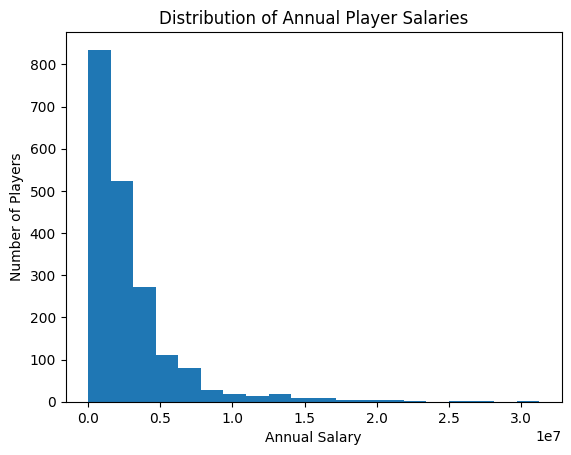

In [28]:
# This histogram shows the distribution of player salaries.
# Most players fall within the lower salary range, while a smaller number
# of players earn significantly higher salaries.
plt.hist(df_clean['annual_gross'], bins=20)
plt.xlabel("Annual Salary")
plt.ylabel("Number of Players")
plt.title("Distribution of Annual Player Salaries")
plt.show()


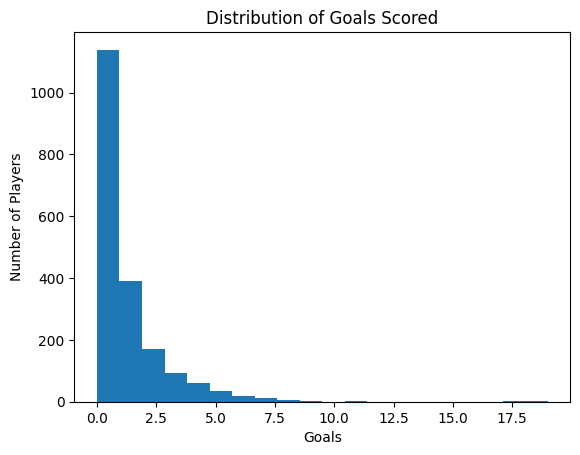

In [29]:
##A histogram was used to visualize the distribution of annual salaries. The distribution is right-skewed, indicating that a small number of players earn significantly higher salaries.
plt.figure()
plt.hist(df_clean['Gls'], bins=20)
plt.xlabel("Goals")
plt.ylabel("Number of Players")
plt.title("Distribution of Goals Scored")
plt.show()


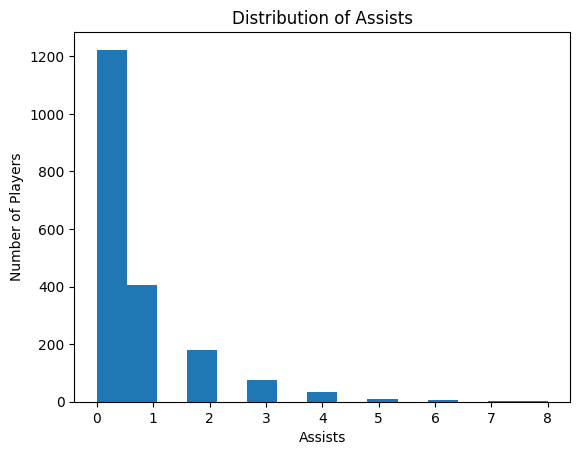

In [30]:
# This histogram shows that most players have a low number of assists,
# which supports the weak-to-moderate correlation with salary.
plt.figure()
plt.hist(df_clean['Ast'], bins=15)
plt.xlabel("Assists")
plt.ylabel("Number of Players")
plt.title("Distribution of Assists")
plt.show()


In [31]:
# Overall, player salaries are only partially aligned with individual performance metrics.
# Other factors such as player position, experience, market value, and popularity
# likely play a significant role in determining salary.
